In [2]:
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv("data.csv")
df = df[6950:].copy()
df.index
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
6950,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0:00:00,1,1,1,0,0,0,...,0,0,0,5.661,4.341,1,111,W,CTL,D
6951,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0:00:25,1,1,2,0,0,0,...,0,0,0,18.502,22.307,4,126,BW,NCTL,ND
6952,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0:01:19,1,1,3,0,0,0,...,0,0,0,4.786,2.926,2,102,BW,NCTL,ND
6953,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0:02:17,1,1,4,0,0,0,...,0,0,0,4.907,4.209,1,120,BC,CTL,ND
6954,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0:03:02,1,1,5,0,0,0,...,0,0,0,12.881,8.676,2,108,W,CTL,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130,C,NCTL,D


In [3]:
df['elapsed_time'] = pd.to_timedelta(df['elapsed_time'])  # 将时间转换为timedelta类型  
import pandas as pd

# 假设df是您的DataFrame

# 初始化球员状态字典
player1_stats = {'ace': 0, 'serve_count': 0, 'serve_won': 0, 'serve_speed_sum': 0, 'winner_count': 0,
                 'points_won': 0, 'break_won': 0, 'unforced_errors': 0, 'errors': 0, 'net_points_won': 0,
                 'distance_run': 0, 'rally_count_sum': 0, 'total_points_lost': 0, 'total_points_scored': 0}
player2_stats = {'ace': 0, 'serve_count': 0, 'serve_won': 0, 'serve_speed_sum': 0, 'winner_count': 0,
                 'points_won': 0, 'break_won': 0, 'unforced_errors': 0, 'errors': 0, 'net_points_won': 0,
                 'distance_run': 0, 'rally_count_sum': 0, 'total_points_lost': 0, 'total_points_scored': 0}

# 初始化特征DataFrame
features_df = pd.DataFrame(columns=['match_id', 'player1_ace', 'player1_serve_count', 'player1_serve_percentage',
                                    'player1_avg_serve_speed', 'player1_winner_count', 'player1_score_percentage',
                                    'player1_break_percentage', 'player1_unforced_errors', 'player1_errors',
                                    'player1_net_percentage', 'player1_distance_run', 'player1_avg_rally_count',
                                    'player1_total_points_lost', 'player1_total_points_scored',
                                    'player2_ace', 'player2_serve_count', 'player2_serve_percentage',
                                    'player2_avg_serve_speed', 'player2_winner_count', 'player2_score_percentage',
                                    'player2_break_percentage', 'player2_unforced_errors', 'player2_errors',
                                    'player2_net_percentage', 'player2_distance_run', 'player2_avg_rally_count',
                                    'player2_total_points_lost', 'player2_total_points_scored'])

# 遍历DataFrame进行特征计算
for index, row in df.iterrows():
    # 获取当前记录的球员和对手
    player = row['player1']
    opponent = row['player2']

    # 根据记录更新球员和对手的状态字典
    player_stats = player1_stats if player == 'Carlos Alcaraz' else player2_stats
    opponent_stats = player2_stats if player == 'Carlos Alcaraz' else player1_stats

    player_stats['ace'] += row['p1_ace']
    player_stats['serve_count'] += 1
    player_stats['serve_won'] += 1 if row['point_victor'] == 1 and row['serve_no'] == 1 else 0
    player_stats['serve_speed_sum'] += row['speed_mph']
    player_stats['winner_count'] += row['p1_winner']
    player_stats['points_won'] += row['point_victor'] == 1
    player_stats['break_won'] += row['p1_break_pt_won']
    player_stats['unforced_errors'] += row['p1_unf_err']
    player_stats['errors'] += row['p1_unf_err'] + row['p1_double_fault']
    player_stats['net_points_won'] += row['p1_net_pt_won']
    player_stats['distance_run'] += row['p1_distance_run']
    player_stats['rally_count_sum'] += row['rally_count']
    player_stats['total_points_lost'] += row['point_victor'] == 2
    player_stats['total_points_scored'] += row['point_victor'] == 1

    opponent_stats['ace'] += row['p2_ace']
    opponent_stats['serve_count'] += 1
    opponent_stats['serve_won'] += 1 if row['point_victor'] == 2 and row['serve_no'] == 1 else 0
    opponent_stats['serve_speed_sum'] += row['speed_mph']
    opponent_stats['winner_count'] += row['p2_winner']
    opponent_stats['points_won'] += row['point_victor'] == 2
    opponent_stats['break_won'] += row['p2_break_pt_won']
    opponent_stats['unforced_errors'] += row['p2_unf_err']
    opponent_stats['errors'] += row['p2_unf_err'] + row['p2_double_fault']
    opponent_stats['net_points_won'] += row['p2_net_pt_won']
    opponent_stats['distance_run'] += row['p2_distance_run']
    opponent_stats['rally_count_sum'] += row['rally_count']
    opponent_stats['total_points_lost'] += row['point_victor'] == 1
    opponent_stats['total_points_scored'] += row['point_victor'] == 2

    # 计算每个特征的值
    player1_serve_percentage = player_stats['serve_won'] / player_stats['serve_count'] if player_stats['serve_count'] > 0 else 0
    player2_serve_percentage = opponent_stats['serve_won'] / opponent_stats['serve_count'] if opponent_stats['serve_count'] > 0 else 0

    player1_avg_serve_speed = player_stats['serve_speed_sum'] / player_stats['serve_count'] if player_stats['serve_count'] > 0 else 0
    player2_avg_serve_speed = opponent_stats['serve_speed_sum'] / opponent_stats['serve_count'] if opponent_stats['serve_count'] > 0 else 0

    player1_score_percentage = player_stats['points_won'] / (player_stats['points_won'] + player_stats['total_points_lost']) if (
            player_stats['points_won'] + player_stats['total_points_lost']) > 0 else 0
    player2_score_percentage = opponent_stats['points_won'] / (
            opponent_stats['points_won'] + opponent_stats['total_points_lost']) if (
                                          opponent_stats['points_won'] + opponent_stats['total_points_lost']) > 0 else 0

    player1_break_percentage = player_stats['break_won'] / (player_stats['break_won'] + opponent_stats['break_won']) if (
            player_stats['break_won'] + opponent_stats['break_won']) > 0 else 0
    player2_break_percentage = opponent_stats['break_won'] / (player_stats['break_won'] + opponent_stats['break_won']) if (
            player_stats['break_won'] + opponent_stats['break_won']) > 0 else 0

    player1_net_percentage = player_stats['net_points_won'] / (
            player_stats['net_points_won'] + opponent_stats['net_points_won']) if (
                                        player_stats['net_points_won'] + opponent_stats['net_points_won']) > 0 else 0
    player2_net_percentage = opponent_stats['net_points_won'] / (
            player_stats['net_points_won'] + opponent_stats['net_points_won']) if (
                                        player_stats['net_points_won'] + opponent_stats['net_points_won']) > 0 else 0

    player1_avg_rally_count = player_stats['rally_count_sum'] / player_stats['serve_count'] if player_stats['serve_count'] > 0 else 0
    player2_avg_rally_count = opponent_stats['rally_count_sum'] / opponent_stats['serve_count'] if opponent_stats['serve_count'] > 0 else 0

    player1_total_points_lost = player_stats['total_points_lost']
    player1_total_points_scored = player_stats['total_points_scored']
    player2_total_points_lost = opponent_stats['total_points_lost']
    player2_total_points_scored = opponent_stats['total_points_scored']

    # 将计算的特征值添加到特征DataFrame
    features_df = features_df._append({'match_id': row['match_id'],
                                      'player1_ace': player_stats['ace'],
                                      'player1_serve_count': player_stats['serve_count'],
                                      'player1_serve_percentage': player1_serve_percentage,
                                      'player1_avg_serve_speed': player1_avg_serve_speed,
                                      'player1_winner_count': player_stats['winner_count'],
                                      'player1_score_percentage': player1_score_percentage,
                                      'player1_break_percentage': player1_break_percentage,
                                      'player1_unforced_errors': player_stats['unforced_errors'],
                                      'player1_errors': player_stats['errors'],
                                      'player1_net_percentage': player1_net_percentage,
                                      'player1_distance_run': player_stats['distance_run'],
                                      'player1_avg_rally_count': player1_avg_rally_count,
                                      'player1_total_points_lost': player1_total_points_lost,
                                      'player1_total_points_scored': player1_total_points_scored,
                                      'player2_ace': opponent_stats['ace'],
                                      'player2_serve_count': opponent_stats['serve_count'],
                                      'player2_serve_percentage': player2_serve_percentage,
                                      'player2_avg_serve_speed': player2_avg_serve_speed,
                                      'player2_winner_count': opponent_stats['winner_count'],
                                      'player2_score_percentage': player2_score_percentage,
                                      'player2_break_percentage': player2_break_percentage,
                                      'player2_unforced_errors': opponent_stats['unforced_errors'],
                                      'player2_errors': opponent_stats['errors'],
                                      'player2_net_percentage': player2_net_percentage,
                                      'player2_distance_run': opponent_stats['distance_run'],
                                      'player2_avg_rally_count': player2_avg_rally_count,
                                      'player2_total_points_lost': player2_total_points_lost,
                                      'player2_total_points_scored': player2_total_points_scored},
                                     ignore_index=True)

# 打印结果
features_df

,match_id,player1_ace,player1_serve_count,player1_serve_percentage,player1_avg_serve_speed,player1_winner_count,player1_score_percentage,player1_break_percentage,player1_unforced_errors,player1_errors,...,player2_winner_count,player2_score_percentage,player2_break_percentage,player2_unforced_errors,player2_errors,player2_net_percentage,player2_distance_run,player2_avg_rally_count,player2_total_points_lost,player2_total_points_scored
0,2023-wimbledon-1701,0,1,0.000000,111.000000,0,0.000000,0,0,0,...,0,1.000000,0,0,0,0,4.341,1.000000,0,1
1,2023-wimbledon-1701,0,2,0.500000,118.500000,0,0.500000,0,0,0,...,0,0.500000,0,0,0,0,26.648,2.500000,1,1
2,2023-wimbledon-1701,0,3,0.333333,113.000000,1,0.666667,0,0,0,...,0,0.333333,0,0,0,0,29.574,2.333333,2,1
3,2023-wimbledon-1701,0,4,0.250000,114.750000,1,0.500000,0,0,0,...,0,0.500000,0,0,0,0,33.783,2.000000,2,2
4,2023-wimbledon-1701,0,5,0.400000,113.400000,1,0.600000,0,0,0,...,0,0.400000,0,1,1,0,42.459,2.000000,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2023-wimbledon-1701,9,330,0.327273,109.324242,65,0.500000,0.5,45,52,...,31,0.500000,0.5,40,43,0.596491,6113.170,4.475758,165,165
330,2023-wimbledon-1701,9,331,0.329305,109.338369,66,0.501511,0.5,45,52,...,31,0.498489,0.5,40,43,0.586207,6140.936,4.477341,166,165
331,2023-wimbledon-1701,9,332,0.328313,109.382530,66,0.500000,0.5,45,52,...,32,0.500000,0.5,40,43,0.586207,6159.264,4.475904,166,166
332,2023-wimbledon-1701,9,333,0.330330,109.444444,66,0.501502,0.5,45,52,...,32,0.498498,0.5,40,43,0.586207,6169.801,4.465465,167,166


In [4]:
df.reset_index(drop=True, inplace=True)
# 这里我实在拼的很草率，认真的同学自行设计
new_df = pd.concat([features_df[['player1_ace', 'player1_serve_count',
       'player1_serve_percentage', 'player1_avg_serve_speed',
       'player1_winner_count', 'player1_score_percentage',
       'player1_break_percentage', 'player1_unforced_errors', 'player1_errors',
       'player1_net_percentage', 'player1_distance_run',
       'player1_avg_rally_count', 'player1_total_points_lost',
       'player1_total_points_scored', 'player2_ace', 'player2_serve_count',
       'player2_serve_percentage', 'player2_avg_serve_speed',
       'player2_winner_count', 'player2_score_percentage',
       'player2_break_percentage', 'player2_unforced_errors', 'player2_errors',
       'player2_net_percentage', 'player2_distance_run',
       'player2_avg_rally_count', 'player2_total_points_lost',
       'player2_total_points_scored']],df[['set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games',  'server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph' ]]], axis=1, ignore_index=True)
tsne_df= new_df
tsne_df.fillna(0,inplace=True)

In [5]:
import matplotlib.pyplot as plt  
from sklearn.manifold import TSNE  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图库
#数据标准化  
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(tsne_df)  
#TSNE进行降维  
tsne = TSNE(n_components=3, random_state=42)  #将n_components设置为3
data_3d = tsne.fit_transform(data_scaled)  
kmeans = KMeans(n_clusters=2, random_state=42)  
clusters = kmeans.fit_predict(data_scaled)

In [6]:
# 打印出所有的列名
category = dict()
for i in range(len(df.columns)):
    category[df.columns[i]] = i
print(category)

{'match_id': 0, 'player1': 1, 'player2': 2, 'elapsed_time': 3, 'set_no': 4, 'game_no': 5, 'point_no': 6, 'p1_sets': 7, 'p2_sets': 8, 'p1_games': 9, 'p2_games': 10, 'p1_score': 11, 'p2_score': 12, 'server': 13, 'serve_no': 14, 'point_victor': 15, 'p1_points_won': 16, 'p2_points_won': 17, 'game_victor': 18, 'set_victor': 19, 'p1_ace': 20, 'p2_ace': 21, 'p1_winner': 22, 'p2_winner': 23, 'winner_shot_type': 24, 'p1_double_fault': 25, 'p2_double_fault': 26, 'p1_unf_err': 27, 'p2_unf_err': 28, 'p1_net_pt': 29, 'p2_net_pt': 30, 'p1_net_pt_won': 31, 'p2_net_pt_won': 32, 'p1_break_pt': 33, 'p2_break_pt': 34, 'p1_break_pt_won': 35, 'p2_break_pt_won': 36, 'p1_break_pt_missed': 37, 'p2_break_pt_missed': 38, 'p1_distance_run': 39, 'p2_distance_run': 40, 'rally_count': 41, 'speed_mph': 42, 'serve_width': 43, 'serve_depth': 44, 'return_depth': 45}


In [7]:
train_label = df.values[:, category['point_victor']]
print(train_label.shape)
print(train_label)

(334,)
[2 1 1 2 1 2 2 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 2 2 1 1
 2 2 1 1 2 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 2 1 2 2 2 1 1 2 2 1 2
 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2
 1 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2
 1 1 1 2 1 2 1 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 1 1 2 1 2 1 1 2 2 1 1 2 2 1
 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2
 2 1 2 1 1 2 2 1 2 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 1 2 1
 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 1 2 1 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1
 1]


In [8]:
import numpy as np

func = lambda s : 1 / (1 + np.exp(-s))
dfunc = lambda s : func(s) * (1-func(s))

def bc(w, z, delta_next):
    delta = np.dot(w.T, delta_next) * dfunc(z)
    return delta

def fc(w, a):
    z_next = np.dot(w, a)
    a_next = func(z_next)
    return a_next, z_next

def cost(a, y):
    J = np.sum((a - y)**2)
    return J / 2

def softmax(z):
    return np.sum(z > 0.5, axis = 0)

def accuracy(a, y):
    acc = np.sum(np.argmax(a, axis = 0) == (y - 1))
    return acc



In [9]:
df.values[:, 0]

array(['2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-1701',
       '2023-wimbledon-1701', '2023-wimbledon-

In [10]:
train_data = np.array(features_df.values[:, 1:29]).astype('float64')
print(train_data)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 2.00000000e+00 5.00000000e-01 ... 2.50000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 3.00000000e+00 3.33333333e-01 ... 2.33333333e+00
  2.00000000e+00 1.00000000e+00]
 ...
 [9.00000000e+00 3.32000000e+02 3.28313253e-01 ... 4.47590361e+00
  1.66000000e+02 1.66000000e+02]
 [9.00000000e+00 3.33000000e+02 3.30330330e-01 ... 4.46546547e+00
  1.67000000e+02 1.66000000e+02]
 [9.00000000e+00 3.34000000e+02 3.32335329e-01 ... 4.46107784e+00
  1.68000000e+02 1.66000000e+02]]


0 test acc: 0.47005988023952094
1 test acc: 0.46407185628742514
2 test acc: 0.46706586826347307
3 test acc: 0.46706586826347307
4 test acc: 0.49101796407185627
5 test acc: 0.48502994011976047
6 test acc: 0.4820359281437126
7 test acc: 0.48502994011976047
8 test acc: 0.47005988023952094
9 test acc: 0.4820359281437126
10 test acc: 0.46706586826347307
11 test acc: 0.47305389221556887
12 test acc: 0.46407185628742514
13 test acc: 0.45808383233532934
14 test acc: 0.46107784431137727
15 test acc: 0.47904191616766467
16 test acc: 0.4820359281437126
17 test acc: 0.47904191616766467
18 test acc: 0.4820359281437126
19 test acc: 0.46407185628742514
20 test acc: 0.4820359281437126
21 test acc: 0.4820359281437126
22 test acc: 0.47005988023952094
23 test acc: 0.47005988023952094
24 test acc: 0.47305389221556887
25 test acc: 0.47305389221556887
26 test acc: 0.47305389221556887
27 test acc: 0.48502994011976047
28 test acc: 0.47305389221556887
29 test acc: 0.4820359281437126
30 test acc: 0.485029940119

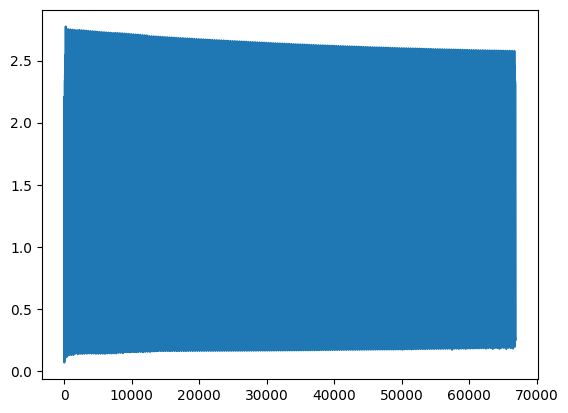

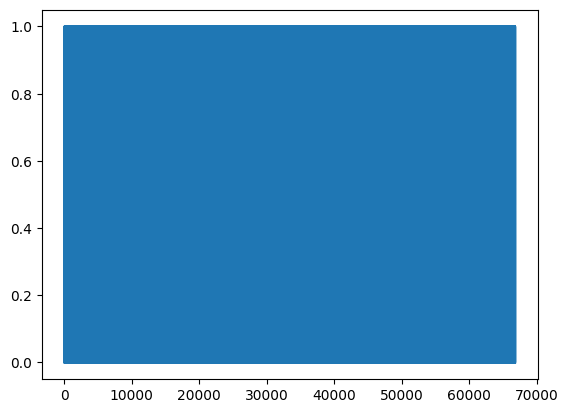

In [11]:
import math
import matplotlib.pyplot as plt

L = 4

train_size = len(train_label)

layer_size = [30, 200, 100, 2]

w = {}
for l in range(1, L):
    w[l] = np.random.randn(layer_size[l], layer_size[l-1]) * math.sqrt(6 / (layer_size[l] + layer_size[l-1]))
alpha = 0.01

J = []
Acc = []
max_epoch = 200
momentum = np.array([[0, 0]])

for epoch_num in range(max_epoch):
    momentum = np.array([[0, 0]])
    
    for k in range(train_size):
        a, z, delta = {}, {}, {}
        a[1] = np.hstack((train_data[k], momentum[0])).reshape(30, 1)
        y = train_label[k]
        
        for l in range(2, L + 1):
            a[l], z[l] = fc(w[l - 1], a[l - 1])
        
        momentum = a[L].T
        delta[L] = (a[L] - y + 1) * dfunc(z[L])
        
        for l in range(L - 1, 1, -1):
            delta[l] = bc(w[l], z[l], delta[l + 1])
            
        for l in range(1, L):
            w[l] = w[l] - alpha * delta[l + 1] @ a[l].T

        J.append(cost(a[L], y))
        Acc.append(accuracy(a[L], y))

    acc = 0
    momentum = np.array([[0, 0]])
    for k in range(train_size):
        a, z, delta = {}, {}, {}
        a[1] = np.hstack((train_data[k], momentum[0])).reshape(30, 1)
        y = train_label[k]
        
        for l in range(2, L + 1):
            a[l], z[l] = fc(w[l - 1], a[l - 1])
        if np.argmax(a[L], axis = 0) == (y - 1):
            acc += 1
    # # end your code #
    # print(epoch_num, "training acc:", Acc[-1], 'test acc:', accuracy(a[L], y))
    print(epoch_num, 'test acc:', acc / train_size)

plt.figure()
plt.plot(J)
# plt.savefig("J_" + str(L) + ".png")
# plt.close()
plt.figure()
plt.plot(Acc)
# plt.savefig("Acc_" + str(L) + ".png")
# plt.close()


# model_name = 'model_' + str(L) + '.pkl'
# with open(model_name, 'wb') as f:
#     pickle.dump([w, layer_size], f)
# print("model saved to {}".format(model_name))

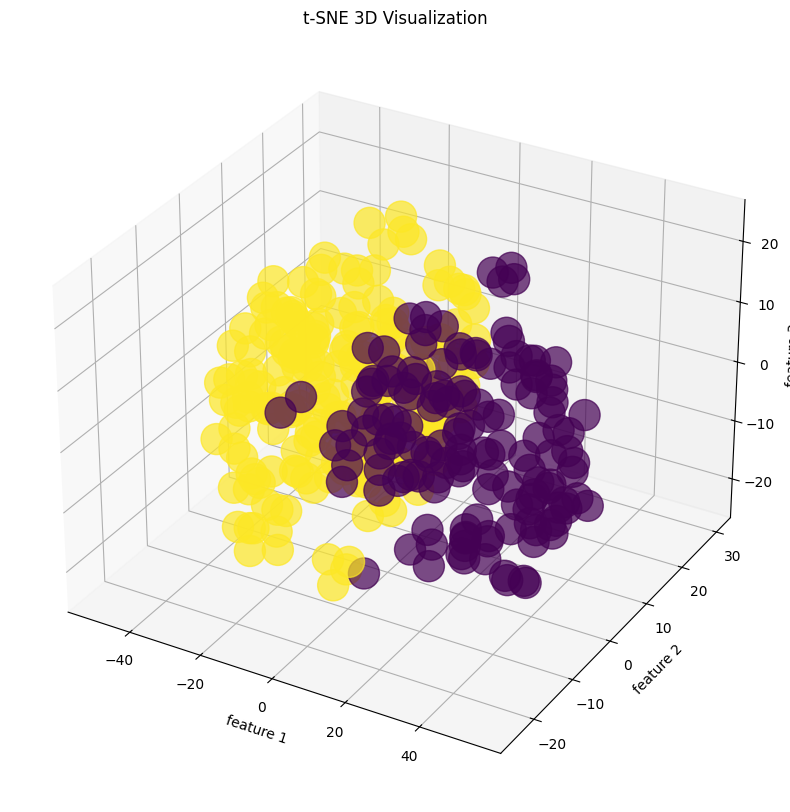

In [12]:
df.reset_index(drop=True, inplace=True)
# 这里我实在拼的很草率，认真的同学自行设计
new_df = pd.concat([features_df[['player1_ace', 'player1_serve_count',
       'player1_serve_percentage', 'player1_avg_serve_speed',
       'player1_winner_count', 'player1_score_percentage',
       'player1_break_percentage', 'player1_unforced_errors', 'player1_errors',
       'player1_net_percentage', 'player1_distance_run',
       'player1_avg_rally_count', 'player1_total_points_lost',
       'player1_total_points_scored', 'player2_ace', 'player2_serve_count',
       'player2_serve_percentage', 'player2_avg_serve_speed',
       'player2_winner_count', 'player2_score_percentage',
       'player2_break_percentage', 'player2_unforced_errors', 'player2_errors',
       'player2_net_percentage', 'player2_distance_run',
       'player2_avg_rally_count', 'player2_total_points_lost',
       'player2_total_points_scored']],df[['set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games',  'server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph' ]]], axis=1, ignore_index=True)
tsne_df= new_df
tsne_df.fillna(0,inplace=True)

import matplotlib.pyplot as plt  
from sklearn.manifold import TSNE  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图库
#数据标准化  
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(tsne_df)  
#TSNE进行降维  
tsne = TSNE(n_components=3, random_state=42)  #将n_components设置为3
data_3d = tsne.fit_transform(data_scaled)  
kmeans = KMeans(n_clusters=2, random_state=42)  
clusters = kmeans.fit_predict(data_scaled)  

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=clusters, cmap='viridis', s=500, alpha=0.7)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
ax.set_title('t-SNE 3D Visualization')

plt.show()

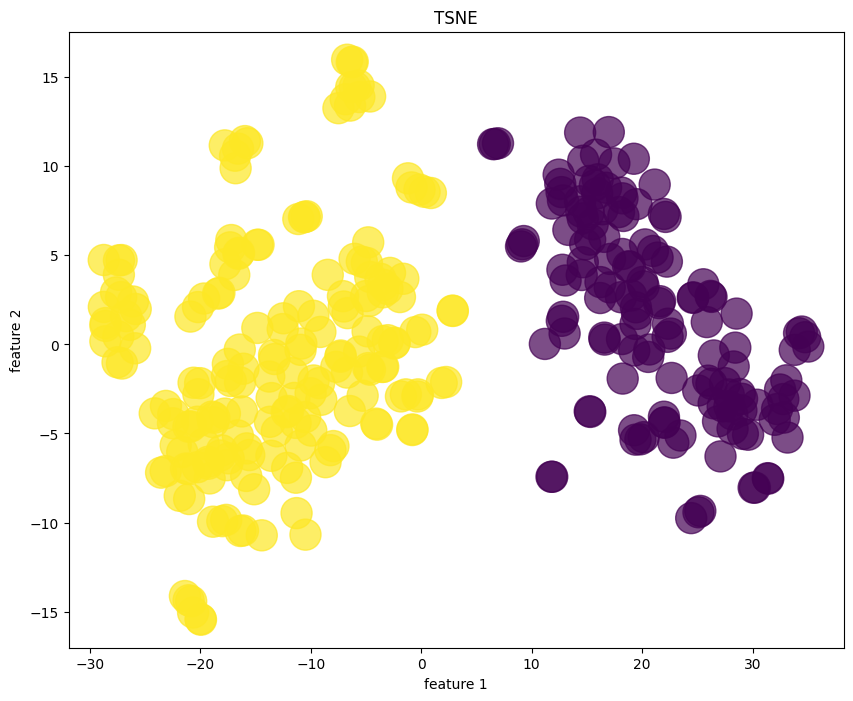

In [13]:
tsne = TSNE(n_components=2, random_state=42)  
data_2d = tsne.fit_transform(data_scaled)  
kmeans = KMeans(n_clusters=2, random_state=42)  
clusters = kmeans.fit_predict(data_2d)  
plt.figure(figsize=(10, 8))  
plt.scatter(data_2d[:, 0], data_2d[:, 1], c= clusters, cmap='viridis', s=500, alpha=0.7)  
plt.xlabel('feature 1')  
plt.ylabel('feature 2')  
plt.title('TSNE')  
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)  
clusters = kmeans.fit_predict(data_2d)
# 这里重新跑了一下，数据很小不影响
centers = kmeans.cluster_centers_  
data = data_2d
cluster_centers_mean = np.mean(kmeans.cluster_centers_, axis=0)

In [15]:
distances = []  
for i in range(len(data)):  
    # 使用欧几里得距离计算点到聚类中心的距离  
    distance = np.linalg.norm(data[i] - centers[0])  
    distances.append(distance)
distances = np.array(distances)  
df['cluster'] = clusters
df["distance"] = distances 
df['distance_znorm'] = (df['distance'] - df['distance'].mean()) / df['distance'].std()  

In [16]:
# 创建一个标记是否发生变化的布尔序列  
# 通过比较当前行与前一行的 'distance' 值  
df['changed'] = df['set_no'].ne(df['set_no'].shift())  
# 提取出发生变化的行  
changed_rows = df[df['changed']]  
# 由于我们使用shift方法，第一行（索引为0）的值会是NaN，因为它没有前一行可以比较  
# 可以通过填充False来修正这一点  
df.loc[0, 'changed'] = False  
changed_rows = df[df['changed']]  
df.drop(columns=['changed'], inplace=True)  # 删除'changed'列
changed_indices = changed_rows.index.tolist()  

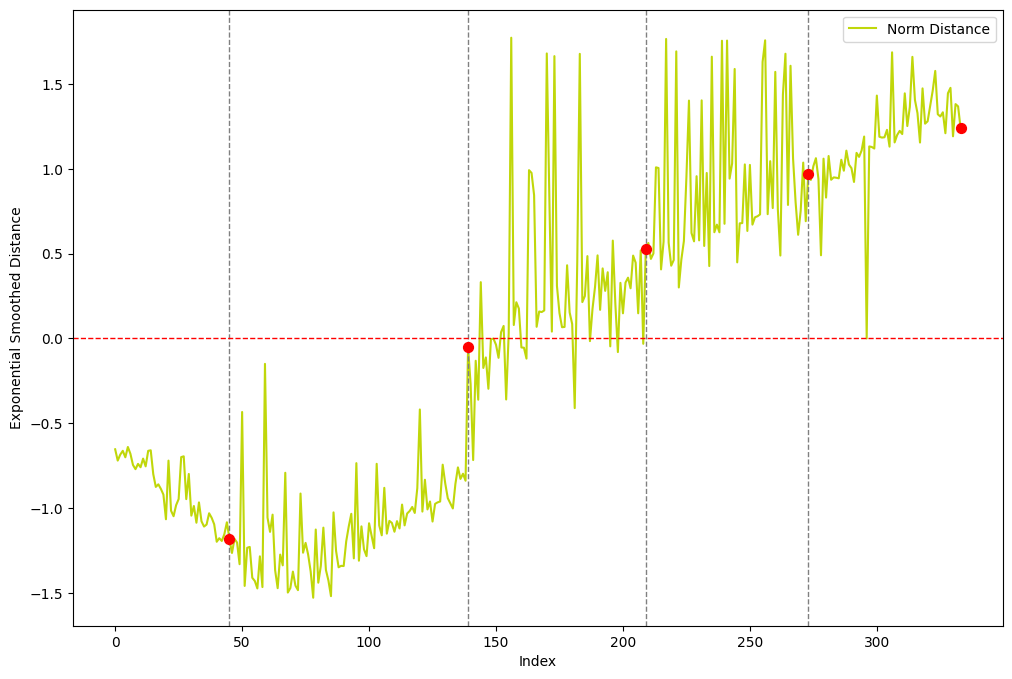

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(df.distance_znorm, label='Norm Distance', color="#C0D70A")
plt.xlabel('Index')
plt.ylabel('Exponential Smoothed Distance')

# 添加竖直分界线
for i in range(4):
    x_position = len(df) * i / 5 
    # plt.axvline(x=x_position, color='gray', linestyle='--', linewidth=1)
    # # 在竖直分界线的位置标记具体点
    # plt.scatter(x_position, df['smoothed_distance'].iloc[int(x_position)], color='red', s=50, zorder=5)    
    plt.axvline(x=changed_indices[i], color='gray', linestyle='--', linewidth=1)
    # 在竖直分界线的位置标记具体点
    plt.scatter(changed_indices[i], df.distance_znorm.iloc[int(changed_indices[i])], color='red', s=50, zorder=5)
# 标最后的点
plt.scatter(len(df)-1, df.distance_znorm.iloc[len(df)-1], color='red', s=50, zorder=5)
# 添加横着的在0处的分界线
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.legend()
plt.show()